In [12]:
Dataset:2005-2017
Number of Datapoints:1048575
Output feature: age

SyntaxError: invalid syntax (<ipython-input-12-7dbf3e6e29b6>, line 2)

In [1]:
#importing the libraries
import pandas as pd
import matplotlib as plt
import numpy as np
import random
import warnings

In [4]:
import os
import glob
import pandas as pd
os.chdir(r"C:\Users\krish\anaconda3\csv")

In [8]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [9]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [2]:
#importing the dataset
data = pd.read_csv(r'C:\Users\krish\anaconda3\csv\combined_csv_nocount.csv')
#data.head()
print(data)
X = data.iloc[:, [0,10]]
Y = data.iloc[:, 11]

         year  race_eth  age_first_birth  current_hrt  menopaus  bmi_group  \
0        2005         1                0            0         1          9   
1        2005         1                0            0         1          1   
2        2005         1                0            0         1          2   
3        2005         1                0            0         1          9   
4        2005         1                1            0         1          4   
...       ...       ...              ...          ...       ...        ...   
1048570  2013         2                3            0         2          4   
1048571  2013         2                3            0         2          1   
1048572  2013         2                3            0         2          1   
1048573  2013         2                3            0         2          2   
1048574  2013         2                3            0         2          2   

         biophx  BIRADS_breast_density  age_menarche  age  \
0 

In [4]:
#find missing values,if any
data.isnull()

,year,race_eth,age_first_birth,current_hrt,menopaus,bmi_group,biophx,BIRADS_breast_density,age_menarche,first_degree_hx,age,breast_cancer_history
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1048571,False,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False,False
1048574,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Missing Data Percentage List
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

year - 0%
race_eth - 0%
age_first_birth - 0%
current_hrt - 0%
menopaus - 0%
bmi_group - 0%
biophx - 0%
BIRADS_breast_density - 0%
age_menarche - 0%
first_degree_hx - 0%
age - 0%
breast_cancer_history - 0%


In [6]:
#removing duplicate rows
data1 = data.drop_duplicates()
print(data1.shape)

(1048576, 12)


In [7]:
print(data)

           year  race_eth  age_first_birth  current_hrt  menopaus  bmi_group  \
0        2005.0       1.0              0.0          0.0       1.0        9.0   
1        2005.0       1.0              0.0          0.0       1.0        1.0   
2        2005.0       1.0              0.0          0.0       1.0        2.0   
3        2005.0       1.0              0.0          0.0       1.0        9.0   
4        2005.0       1.0              1.0          0.0       1.0        4.0   
...         ...       ...              ...          ...       ...        ...   
1048571  2013.0       2.0              3.0          0.0       2.0        4.0   
1048572  2013.0       2.0              3.0          0.0       2.0        1.0   
1048573  2013.0       2.0              3.0          0.0       2.0        1.0   
1048574  2013.0       2.0              3.0          0.0       2.0        2.0   
1048575  2013.0       2.0              3.0          0.0       2.0        2.0   

         biophx  BIRADS_breast_density 

In [12]:
data.dtypes

year                     int64
race_eth                 int64
age_first_birth          int64
current_hrt              int64
menopaus                 int64
bmi_group                int64
biophx                   int64
BIRADS_breast_density    int64
breast_cancer_history    int64
age_menarche             int64
first_degree_hx          int64
age                      int64
dtype: object

In [13]:
data.age.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [14]:
data.age.value_counts()

6     180442
7     178855
5     138143
8     111530
4      94031
9      92285
10     71018
11     57960
12     41881
3      37707
13     26146
2      14032
1       4545
Name: age, dtype: int64

In [15]:
label_numbers = ['group1', 'group2', 'group3']
cut_bins = [0, 4, 8, 13]
age_groups = pd.cut(data['age'], bins=cut_bins, labels=label_numbers)
age_groups

0          group1
1          group1
2          group1
3          group1
4          group1
            ...  
1048570    group3
1048571    group3
1048572    group3
1048573    group3
1048574    group3
Name: age, Length: 1048575, dtype: category
Categories (3, object): ['group1' < 'group2' < 'group3']

In [16]:
age_groups.value_counts()
#pd.cut(data['age_groups'],bins=3).value_counts()

group2    608970
group3    289290
group1    150315
Name: age, dtype: int64

In [17]:
df = pd.DataFrame(data)
df['age_subgroups'] = age_groups
df

,year,race_eth,age_first_birth,current_hrt,menopaus,bmi_group,biophx,BIRADS_breast_density,breast_cancer_history,age_menarche,first_degree_hx,age,age_subgroups
0,2005,1,0,0,1,9,0,2,0,0,0,1,group1
1,2005,1,0,0,1,1,0,4,0,0,0,1,group1
2,2005,1,0,0,1,2,0,4,0,0,0,1,group1
3,2005,1,0,0,1,9,0,4,0,0,0,1,group1
4,2005,1,1,0,1,4,0,4,0,0,0,1,group1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2013,2,3,0,2,4,1,1,1,1,0,9,group3
1048571,2013,2,3,0,2,1,0,2,0,1,0,9,group3
1048572,2013,2,3,0,2,1,1,2,0,1,0,9,group3
1048573,2013,2,3,0,2,2,0,2,0,1,0,9,group3


In [26]:
#ownloading the updated csv file to local desktop
df.to_csv(r"C:\Users\krish\anaconda3\csv\updated.csv")

In [8]:
#pre processing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = scaler.fit_transform(X)

In [9]:
#shuffling the data
data = data.sample(frac=1).reset_index(drop=True)

In [10]:
data.head()

,year,race_eth,age_first_birth,current_hrt,menopaus,bmi_group,biophx,BIRADS_breast_density,age_menarche,first_degree_hx,age,breast_cancer_history
0,2012.0,1.0,4.0,0.0,1.0,3.0,0.0,2.0,1.0,1.0,5.0,0.0
1,2005.0,9.0,9.0,9.0,2.0,9.0,0.0,3.0,9.0,0.0,6.0,0.0
2,2011.0,1.0,9.0,0.0,2.0,9.0,0.0,2.0,0.0,0.0,9.0,0.0
3,2008.0,3.0,9.0,0.0,2.0,9.0,0.0,1.0,9.0,0.0,8.0,0.0
4,2008.0,1.0,4.0,9.0,2.0,2.0,1.0,2.0,9.0,0.0,13.0,0.0


In [3]:
#Splitting the dataset into the Training set and Test set to 80 and 20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)
print (X_train.shape , Y_train.shape)
print (X_test.shape, Y_test.shape)

(838860, 2) (838860,)
(209715, 2) (209715,)


In [12]:
data.tail()

,year,race_eth,age_first_birth,current_hrt,menopaus,bmi_group,biophx,BIRADS_breast_density,age_menarche,first_degree_hx,age,breast_cancer_history
1048571,2007.0,1.0,2.0,0.0,2.0,4.0,1.0,1.0,2.0,0.0,9.0,0.0
1048572,2012.0,5.0,2.0,0.0,9.0,2.0,0.0,2.0,9.0,9.0,4.0,0.0
1048573,2005.0,1.0,9.0,9.0,9.0,9.0,0.0,3.0,9.0,1.0,4.0,9.0
1048574,2012.0,5.0,4.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,7.0,9.0
1048575,2009.0,2.0,2.0,0.0,2.0,9.0,0.0,2.0,9.0,0.0,10.0,9.0


In [4]:
#ignore all caught warnings   
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=42, shuffle=True)
print ("Train Set                                            Test Set         ")
for train_set,test_set in cv.split(X):
    print(train_set , test_set)

Train Set                                            Test Set         
[      1       2       3 ... 1048572 1048573 1048574] [      0      12      14 ... 1048554 1048557 1048564]
[      0       1       2 ... 1048571 1048573 1048574] [      7      20      36 ... 1048560 1048567 1048572]
[      0       1       2 ... 1048572 1048573 1048574] [     10      17      24 ... 1048513 1048543 1048566]
[      0       1       2 ... 1048572 1048573 1048574] [      6       9      32 ... 1048540 1048558 1048563]
[      0       1       3 ... 1048570 1048571 1048572] [      2      11      29 ... 1048561 1048573 1048574]
[      0       1       2 ... 1048572 1048573 1048574] [     26      30      40 ... 1048522 1048542 1048570]
[      0       1       2 ... 1048572 1048573 1048574] [      4      16      19 ... 1048523 1048526 1048527]
[      0       2       3 ... 1048572 1048573 1048574] [      1      46      66 ... 1048552 1048562 1048565]
[      0       1       2 ... 1048572 1048573 1048574] [      3   

In [14]:
#Principal component Analysis 
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder

In [261]:
#Univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv(r'C:\Users\krish\anaconda3\bcsc.csv')
X = data.iloc[:,0:14]  #independent columns
Y = data.iloc[:,-1]    
bestfeatures = SelectKBest(score_func=chi2, k=1)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))

                    Specs          Score
12                    age  417043.790818
11                  count  116288.435107
7                menopaus   98189.769160
6             current_hrt   97051.078297
2         first_degree_hx   25596.486870
4         age_first_birth   11599.343219
1                race_eth   10178.467399
10  breast_cancer_history    8637.752458
9                  biophx    8565.910375
3            age_menarche    7916.381988
8               bmi_group    4092.192947
5   BIRADS_breast_density    3743.020721
0                    year      13.401966


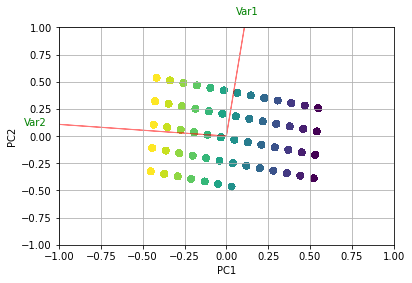

In [268]:
#PCA analysis
import matplotlib.pyplot as plt
X = data.iloc[:, [0,12]]
y = data.iloc[:, -1]
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [269]:
pca.explained_variance_ratio_


array([0.78763335, 0.21236665])

In [270]:
print(abs(pca.components_))

[[0.10716253 0.99424152]
 [0.99424152 0.10716253]]


In [24]:
#Randomforest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1) # Instantiate model with 100 decision trees
rf.fit(X_train, Y_train);#train model on training data

In [25]:
predictions = rf.predict(X_test) #make predictions on test data
errors = abs(predictions - Y_test) #calculate absolute errors
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.07 degrees.


In [26]:
#calculating accuracy
mape = 100 * (errors / Y_test) #calculate mean absolute percentage error mape
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 66.67 %.


In [27]:
#Naive Bayes calssification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [28]:
Y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(Y_test,Y_pred)*100
accuracy

17.11227141596929

In [42]:
from sklearn import svm

In [43]:
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train,Y_train)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("accuracy:", metrics.accuracy_score(Y_test,Y_pred))

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [40]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [41]:
y_pred = dtree.predict(X_test)

In [42]:
count_misclassified = (Y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 172979
Accuracy: 0.18


In [5]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib as plt
import numpy as np
import random
import warnings

Using TensorFlow backend.


In [6]:
#importing the dataset
data = pd.read_csv(r'C:\Users\krish\anaconda3\csv\combined_csv_nocount.csv')
#data.head()
print(data)
X = data.iloc[:, [0,10]]
Y = data.iloc[:, 11]

         year  race_eth  age_first_birth  current_hrt  menopaus  bmi_group  \
0        2005         1                0            0         1          9   
1        2005         1                0            0         1          1   
2        2005         1                0            0         1          2   
3        2005         1                0            0         1          9   
4        2005         1                1            0         1          4   
...       ...       ...              ...          ...       ...        ...   
1048570  2013         2                3            0         2          4   
1048571  2013         2                3            0         2          1   
1048572  2013         2                3            0         2          1   
1048573  2013         2                3            0         2          2   
1048574  2013         2                3            0         2          2   

         biophx  BIRADS_breast_density  age_menarche  age  \
0 

In [7]:
# define the keras model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# fit the keras model on the dataset
model.fit(X, Y, epochs=5, batch_size=10)

Epoch 1/5
1048575/1048575 [==============================] - 192s 183us/step - loss: -640083365.1096 - accuracy: 0.3367
Epoch 2/5
1048575/1048575 [==============================] - 226s 215us/step - loss: -844771259.7559 - accuracy: 0.3372
Epoch 3/5
1048575/1048575 [==============================] - 195s 186us/step - loss: -1088429160.4333 - accuracy: 0.3364
Epoch 4/5
1048575/1048575 [==============================] - 215s 205us/step - loss: -1376156316.6321 - accuracy: 0.3369
Epoch 5/5
1048575/1048575 [==============================] - 226s 216us/step - loss: -1709068518.5191 - accuracy: 0.3362


In [14]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

1048575/1048575 [==============================] - 21s 20us/step
Accuracy: 53.24
